# Visualising Stage Surfaces

Examples of visualsing surface types associated with each stage.

In [1]:
from dakar_rallydj.getter import get_stages

sectors_df, stage_surfaces_df, section_surfaces_df, surfaces_df = get_stages()

## Percentage distribution of surfaces

Let's start by looking at a dodged bar chart of showing the surface type as a percentage of the length of each stage.

In [2]:
stage_surfaces_df.head()

,code,percentage,color,type
0,01200,18,#753a05,dirt track
1,01200,28,#1dc942,gravel track
2,01200,53,#efc07c,sand
3,01200,18,#753a05,dirt track
4,01200,28,#1dc942,gravel track


Load in required packages and set up the `matplotlib` plotting backend.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use this in VS Code
%matplotlib inline

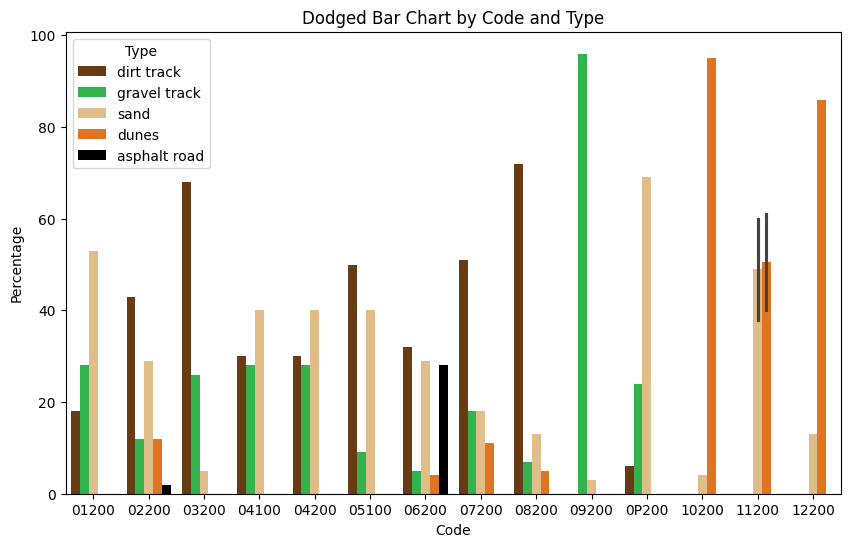

In [4]:
# Mapping types to colors
type_color_map = dict(
    zip(stage_surfaces_df['type'], stage_surfaces_df['color']))

# Create the plot
plt.figure(figsize=(10, 6))

sns.barplot(
    data=stage_surfaces_df,
    x="code",
    y="percentage",
    hue="type",
    palette=type_color_map
)

# Adjust labels and title
plt.title("Dodged Bar Chart by Code and Type")
plt.xlabel("Code")
plt.ylabel("Percentage")
plt.legend(title="Type")
plt.show()

There's something strange going on in stage 11 (code `11200`) — it looks as if we are averaging mutliple values?

In [5]:
stage_surfaces_df[stage_surfaces_df["code"]=="11200"]

,code,percentage,color,type
121,11200,61,#ff7200,dunes
122,11200,38,#efc07c,sand
123,11200,40,#ff7200,dunes
124,11200,60,#efc07c,sand


Ah, it looks like the values may have been incorrectly entered: but which are the correct values?

In terms of distance, how many km are are associated with each surface type on each stage?

To find that, we need to multiply the percentage by the distance.

In [6]:
import pandas as pd

stage_surfaces_df = pd.merge(
    sectors_df[["code", "length"]], stage_surfaces_df, on="code")
stage_surfaces_df["distance"] = stage_surfaces_df["length"] * \
    stage_surfaces_df["percentage"]/100

stage_surfaces_df.head()

,code,length,percentage,color,type,distance
0,01200,413,18,#753a05,dirt track,74.34
1,01200,413,28,#1dc942,gravel track,115.64
2,01200,413,53,#efc07c,sand,218.89
3,01200,413,18,#753a05,dirt track,74.34
4,01200,413,28,#1dc942,gravel track,115.64


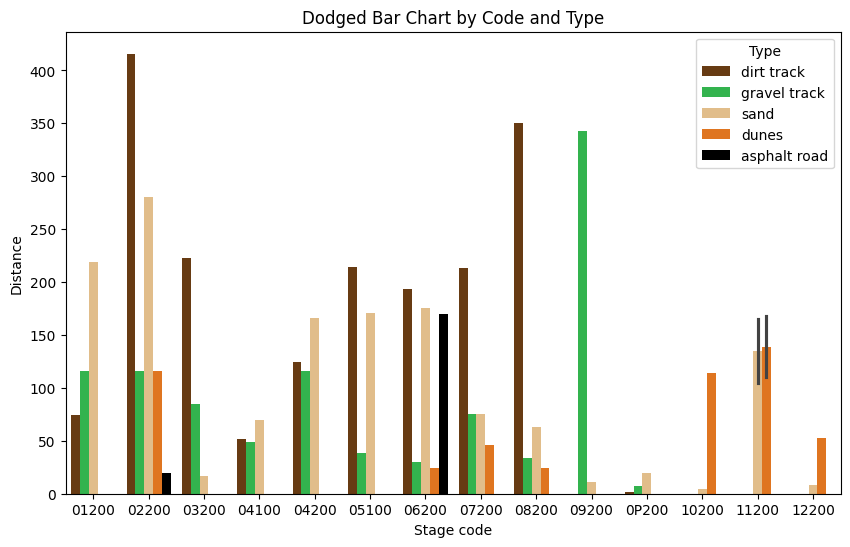

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))

sns.barplot(
    data=stage_surfaces_df,
    x="code",
    y="distance",
    hue="type",
    palette=type_color_map
)

# Adjust labels and title
plt.title("Dodged Bar Chart by Code and Type")
plt.xlabel("Stage code")
plt.ylabel("Distance")
plt.legend(title="Type")
plt.show()

## Stage Section Surfaces

Each competitive stage is split into several sections, of different surface types. For each stage, visualise the stage by section surface type.

In [8]:
section_surfaces_df.head()

,code,section,start,finish,color,type
0,01200,1,0,27,#efc07c,sand
1,01200,2,27,32,#753a05,dirt track
2,01200,3,32,32,#1dc942,gravel track
3,01200,4,32,41,#efc07c,sand
4,01200,5,41,42,#753a05,dirt track


<Figure size 640x480 with 0 Axes>

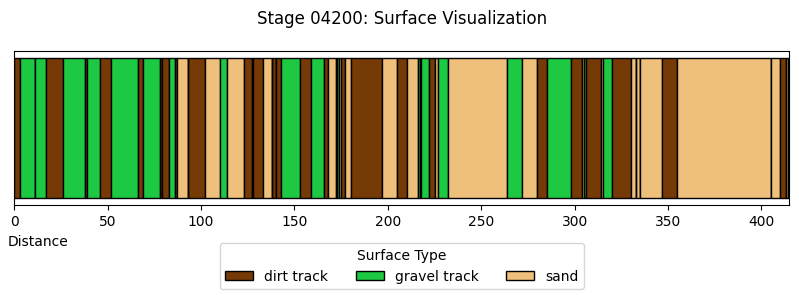

In [ ]:
def plot_section_surface_chart(stage_code):
    # Filter data for the selected stage code
    stage_df = section_surfaces_df[section_surfaces_df['code']
                                   == stage_code].sort_values(by='start')

    #CLear plot object
    plt.clf()

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 2))


    # Plot each section as a horizontal bar
    for _, row in stage_df.iterrows():
        ax.barh(
            y=0,  # Single row
            width=row['finish'] - row['start'],  # Bar width is finish - start
            left=row['start'],  # Start position of the bar
            color=row['color'],  # Color based on surface type
            edgecolor='black',
            label=row['type']  # Label for legend
        )

    # Add legend (only unique types)
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title="Surface Type",
              loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)

    # Set title and axis labels
    ax.set_title(f"Stage {stage_code}: Surface Visualization", pad=20)
    ax.set_xlabel("Distance", x=0.03)
    ax.set_yticks([])  # Hide y-axis ticks as it's a single row
    # Adjust x-axis limit to max finish value
    ax.set_xlim(
        0, section_surfaces_df[section_surfaces_df['code'] == stage_code]['finish'].max())

    # Show the plot
    #plt.tight_layout()
    plt.show();


plot_section_surface_chart("04200")

<Figure size 640x480 with 0 Axes>

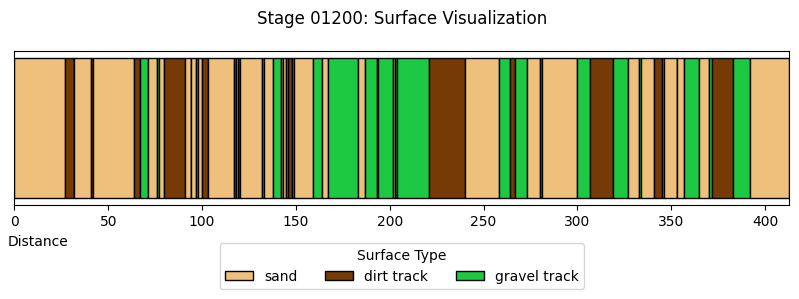

<Figure size 640x480 with 0 Axes>

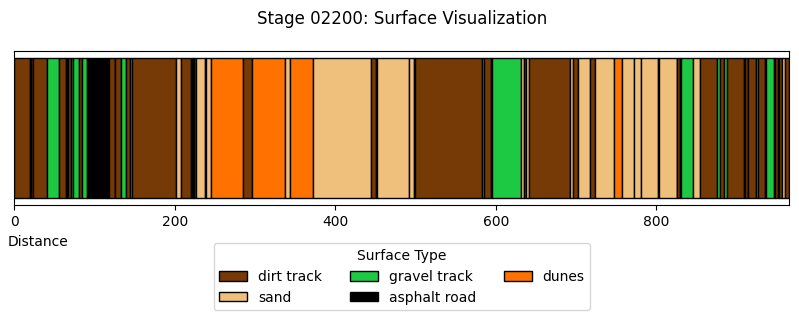

<Figure size 640x480 with 0 Axes>

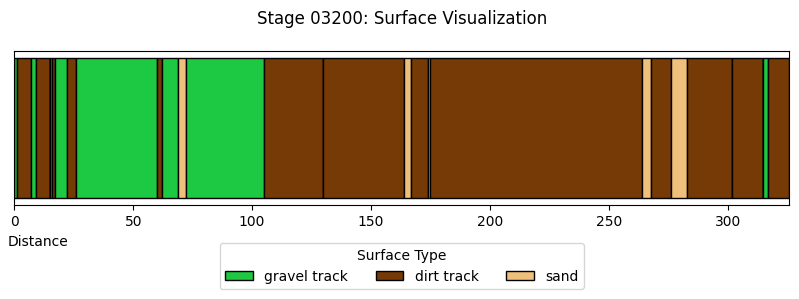

<Figure size 640x480 with 0 Axes>

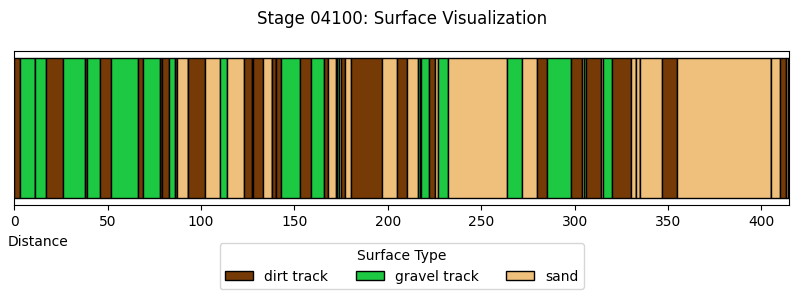

<Figure size 640x480 with 0 Axes>

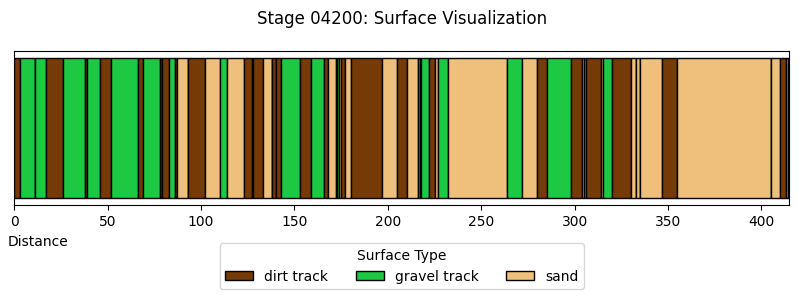

<Figure size 640x480 with 0 Axes>

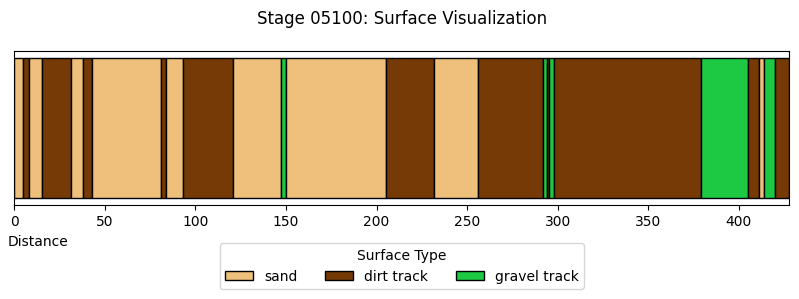

<Figure size 640x480 with 0 Axes>

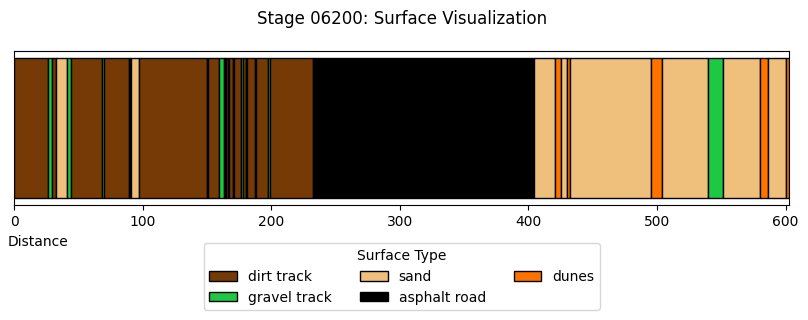

<Figure size 640x480 with 0 Axes>

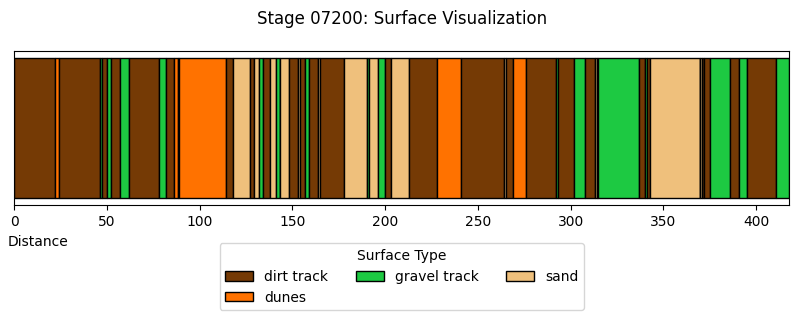

<Figure size 640x480 with 0 Axes>

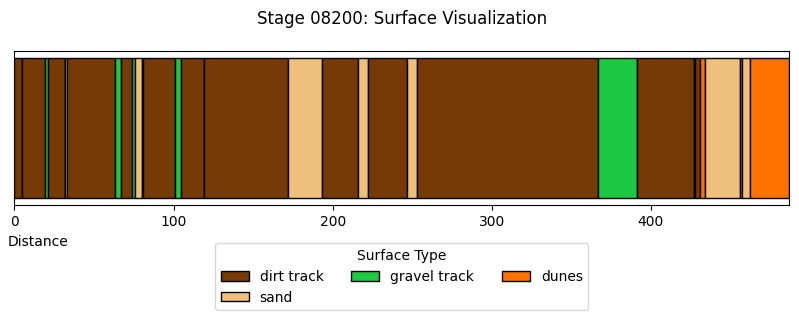

<Figure size 640x480 with 0 Axes>

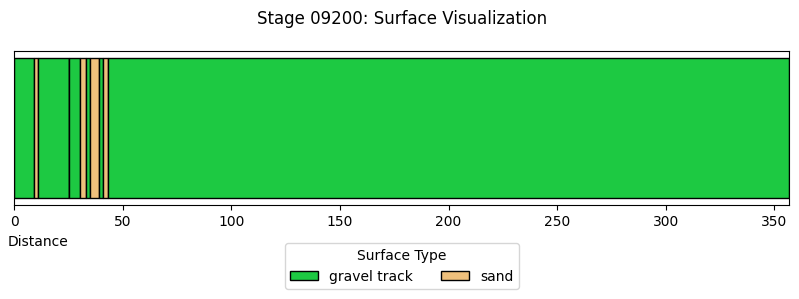

<Figure size 640x480 with 0 Axes>

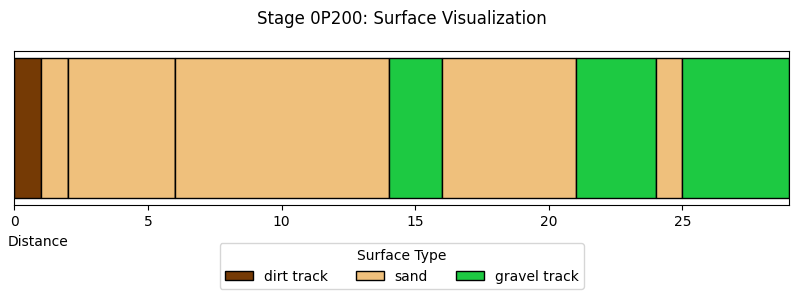

<Figure size 640x480 with 0 Axes>

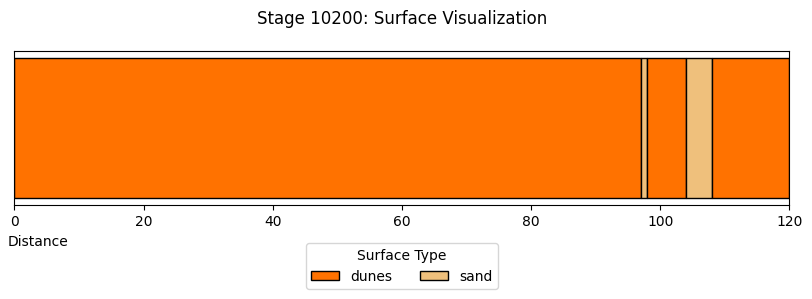

<Figure size 640x480 with 0 Axes>

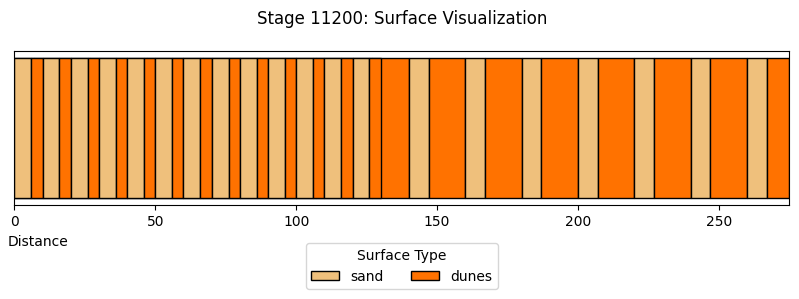

<Figure size 640x480 with 0 Axes>

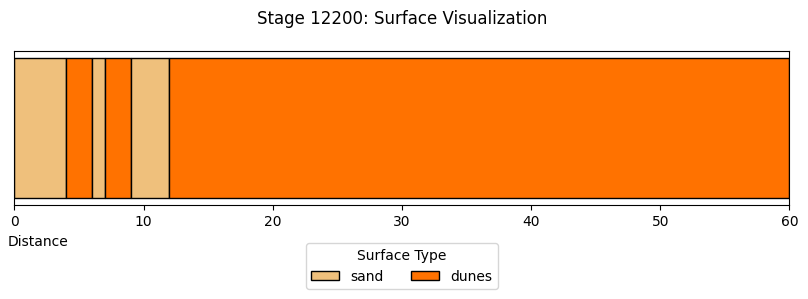

""


In [23]:
def plot_stage(stage_data):
    """
    Plot a single stage's surface visualization.
    """
    # Clear any current figure
    plt.clf()

    # Extract the stage code
    stage_code = stage_data['code'].iloc[0]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 2))

    # Plot each section as a horizontal bar using apply
    stage_data.apply(
        lambda row: ax.barh(
            y=0,  # Single row
            width=row['finish'] - row['start'],  # Bar width is finish - start
            left=row['start'],  # Start position of the bar
            color=row['color'],  # Color based on surface type
            edgecolor='black',
            label=row['type']  # Label for legend
        ), axis=1
    )

    # Add legend (only unique types)
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title="Surface Type",
              loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)

    # Set title and axis labels
    ax.set_title(f"Stage {stage_code}: Surface Visualization", pad=20)
    ax.set_xlabel("Distance", x=0.03)
    ax.set_yticks([])  # Hide y-axis ticks as it's a single row
    # Adjust x-axis limit to max finish value
    ax.set_xlim(0, stage_data['finish'].max())

    # Show the plot
    #plt.tight_layout()
    plt.show();


# Group by 'code' and plot each stage
section_surfaces_df.groupby('code')[section_surfaces_df.columns].apply(plot_stage)

# Stage Surface Dashboard

We can use the `ipywidgets` framework to provide us with simple dropdown menu controls to select stages and the percentage or distance associated with each surface type  and then display a surface type chart for just that stage.

In [16]:
from ipywidgets import interact, widgets

plt.figure(figsize=(10, 6))

def plot_stage_surface_chart(selected_code, typ):
    plt.clf()

    # Filter the DataFrame for the selected code
    filtered_df = stage_surfaces_df[stage_surfaces_df['code'] == selected_code]

    # Create the plot (remove plt.figure() call)
    sns.barplot(
        data=filtered_df,
        x="type",
        y=typ,
        palette=type_color_map,
        hue="type",
        legend=False
    )

    # Adjust labels and title
    plt.title(f"Dodged Bar Chart for Code {selected_code}")
    plt.xlabel("Surface type")
    plt.ylabel(f"{typ.capitalize()}")
    plt.xticks(rotation=45)
    plt.show();

# Create dropdown widget
code_dropdown = widgets.Dropdown(
    options=stage_surfaces_df['code'].unique(),
    description='Code:',
    value=stage_surfaces_df['code'].unique()[0]
)

typ_dropdown = widgets.Dropdown(
    options=['percentage', 'distance'],  # Add options for Y-axis
    description='Y-axis:',
    value='percentage')

# Interactive plot
interact(plot_stage_surface_chart,
         selected_code=code_dropdown, typ=typ_dropdown);

interactive(children=(Dropdown(description='Code:', options=('01200', '02200', '03200', '04100', '04200', '051…

In [ ]:
# Create dropdown widget
code_dropdown2 = widgets.Dropdown(
    options=stage_surfaces_df['code'].unique(),
    description='Code:',
    value=stage_surfaces_df['code'].unique()[0]
)

_ = interact(plot_section_surface_chart,
         stage_code=code_dropdown2);

interactive(children=(Dropdown(description='Code:', options=('01200', '02200', '03200', '04100', '04200', '051…